In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
img_width, img_height = 224, 224

In [3]:
IMAGE_SIZE=224
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [4]:
base_model=ResNet50(weights='imagenet',include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

In [5]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("train",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 7367 files belonging to 3 classes.


In [7]:
class_names=dataset.class_names
class_names

['0_Normal', '1_Covid19', '2_Pneumonia']

In [8]:
len(dataset)

231

In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 224, 224, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 1, 2, 1, 2, 2, 2, 2], dtype=int32)>>


2024-04-27 10:14:21.508046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[38.641617 38.641617 38.641617]
  [41.       41.       41.      ]
  [44.20808  44.20808  44.20808 ]
  ...
  [38.352463 38.352463 38.352463]
  [36.922585 36.922585 36.922585]
  [31.031652 31.031652 31.031652]]

 [[38.916668 38.916668 38.916668]
  [41.252235 41.252235 41.252235]
  [43.593    43.593    43.593   ]
  ...
  [33.347416 33.347416 33.347416]
  [29.993313 29.993313 29.993313]
  [29.572906 29.572906 29.572906]]

 [[39.339287 39.339287 39.339287]
  [41.91889  41.91889  41.91889 ]
  [44.374767 44.374767 44.374767]
  ...
  [31.783892 31.783892 31.783892]
  [27.668903 27.668903 27.668903]
  [26.190222 26.190222 26.190222]]

 ...

 [[37.303093 37.303093 37.303093]
  [37.579613 37.579613 37.579613]
  [36.32591  36.32591  36.32591 ]
  ...
  [35.       35.       35.      ]
  [34.583347 34.583347 34.583347]
  [34.85989  34.85989  34.85989 ]]

 [[38.       38.       38.      ]
  [38.       38.       38.      ]
  [37.162945 37.162945 37.162945]
  ...
  [35.       35.       35. 

2024-04-27 10:14:23.338659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-27 10:14:25.743946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


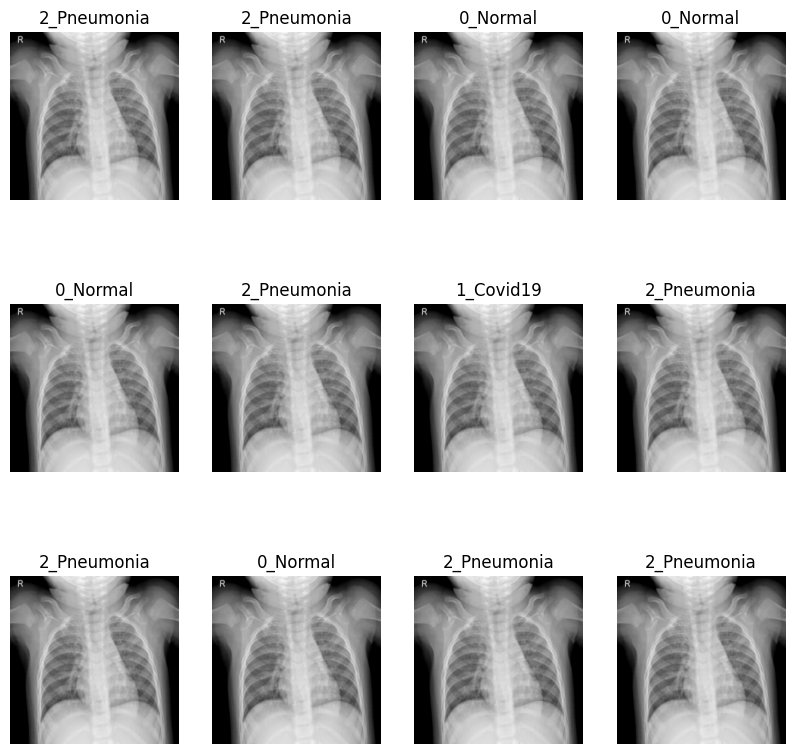

In [11]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(3):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [12]:
train_size=0.8
len(dataset)*train_size

184.8

In [13]:
train_ds=dataset.take(1766)
train_ds
len(train_ds)

231

In [14]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split *ds_size)
    val_size=int(val_split *ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds
len(train_ds)

231

In [15]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

184

In [17]:
len(val_ds)

23

In [18]:
len(test_ds)

24

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [23]:
resize_and_rescale=tf.keras.Sequential([
    layers.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/224)
])

In [24]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [29]:
last_layer = base_model.get_layer('conv5_block3_out')

In [30]:
x = Flatten()(last_layer.output)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(20, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [31]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 126,369,684 (482.06 MB)

 Trainable params: 102,781,972 (392.08 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [36]:
optimizer = Adam(learning_rate=1e-6)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_ds,
                    steps_per_epoch=80,
                    epochs = 50,
                    validation_data = val_ds,
                    validation_steps = 10)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.2545 - loss: 3.9358 - val_accuracy: 0.4938 - val_loss: 1.5349
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 240s 3s/step - accuracy: 0.4103 - loss: 2.2377 - val_accuracy: 0.4563 - val_loss: 1.4322
Epoch 3/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:42 3s/step - accuracy: 0.3721 - loss: 2.1311

2024-04-27 10:26:10.307380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 926ms/step - accuracy: 0.3769 - loss: 2.0610 - val_accuracy: 0.3854 - val_loss: 1.6630
Epoch 4/50


2024-04-27 10:26:16.707700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.4257 - loss: 1.9319 - val_accuracy: 0.4156 - val_loss: 1.4403
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.4136 - loss: 1.8363 - val_accuracy: 0.4688 - val_loss: 1.2454
Epoch 6/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:33 3s/step - accuracy: 0.3901 - loss: 1.7726

2024-04-27 10:35:30.394564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 879ms/step - accuracy: 0.3805 - loss: 1.8163 - val_accuracy: 0.4792 - val_loss: 1.3193
Epoch 7/50


2024-04-27 10:35:36.613634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.4746 - loss: 1.5549 - val_accuracy: 0.4844 - val_loss: 1.2772
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.4519 - loss: 1.5482 - val_accuracy: 0.4000 - val_loss: 1.2848
Epoch 9/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:41 3s/step - accuracy: 0.4438 - loss: 1.5538

2024-04-27 10:44:52.182302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 925ms/step - accuracy: 0.4467 - loss: 1.5245 - val_accuracy: 0.4375 - val_loss: 1.3100
Epoch 10/50


2024-04-27 10:44:58.768659: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.4670 - loss: 1.3688 - val_accuracy: 0.4469 - val_loss: 1.2711
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.4827 - loss: 1.3073 - val_accuracy: 0.4563 - val_loss: 1.2471
Epoch 12/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:38 3s/step - accuracy: 0.4914 - loss: 1.3956

2024-04-27 10:54:16.785892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 75s 909ms/step - accuracy: 0.4847 - loss: 1.4029 - val_accuracy: 0.4688 - val_loss: 1.2254
Epoch 13/50


2024-04-27 10:54:23.343184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.5139 - loss: 1.1924 - val_accuracy: 0.4313 - val_loss: 1.2702
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.4811 - loss: 1.2097 - val_accuracy: 0.4313 - val_loss: 1.2427
Epoch 15/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:46 3s/step - accuracy: 0.5144 - loss: 1.1247

2024-04-27 11:03:47.762970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 946ms/step - accuracy: 0.5235 - loss: 1.1296 - val_accuracy: 0.4583 - val_loss: 1.1215
Epoch 16/50


2024-04-27 11:03:54.091015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.5361 - loss: 1.1119 - val_accuracy: 0.4406 - val_loss: 1.2006
Epoch 17/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.5502 - loss: 1.0280 - val_accuracy: 0.4375 - val_loss: 1.2383
Epoch 18/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:52 3s/step - accuracy: 0.5406 - loss: 1.0557

2024-04-27 11:13:43.690456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 982ms/step - accuracy: 0.5475 - loss: 1.0277 - val_accuracy: 0.3958 - val_loss: 1.3012
Epoch 19/50


2024-04-27 11:13:50.131747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 282s 4s/step - accuracy: 0.5669 - loss: 0.9539 - val_accuracy: 0.4125 - val_loss: 1.2405
Epoch 20/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.5790 - loss: 0.9332 - val_accuracy: 0.4625 - val_loss: 1.2147
Epoch 21/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:45 3s/step - accuracy: 0.5449 - loss: 1.0232

2024-04-27 11:24:32.877706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 946ms/step - accuracy: 0.5536 - loss: 1.0144 - val_accuracy: 0.4583 - val_loss: 1.1738
Epoch 22/50


2024-04-27 11:24:39.592093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.5761 - loss: 0.9372 - val_accuracy: 0.4219 - val_loss: 1.2673
Epoch 23/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.5714 - loss: 0.9075 - val_accuracy: 0.4531 - val_loss: 1.1719
Epoch 24/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 0.5790 - loss: 0.8941

2024-04-27 11:34:16.258555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 914ms/step - accuracy: 0.5857 - loss: 0.8777 - val_accuracy: 0.4271 - val_loss: 1.1739
Epoch 25/50


2024-04-27 11:34:22.711611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.6136 - loss: 0.8639 - val_accuracy: 0.4406 - val_loss: 1.1865
Epoch 26/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.6082 - loss: 0.8567 - val_accuracy: 0.4250 - val_loss: 1.2434
Epoch 27/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:36 3s/step - accuracy: 0.6646 - loss: 0.7498

2024-04-27 11:43:49.948664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 899ms/step - accuracy: 0.6451 - loss: 0.7844 - val_accuracy: 0.3854 - val_loss: 1.3285
Epoch 28/50


2024-04-27 11:43:56.542383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.6473 - loss: 0.7857 - val_accuracy: 0.4031 - val_loss: 1.2023
Epoch 29/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.6242 - loss: 0.7884 - val_accuracy: 0.4313 - val_loss: 1.2512
Epoch 30/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 0.6567 - loss: 0.7928

2024-04-27 11:53:15.234988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 75s 912ms/step - accuracy: 0.6573 - loss: 0.8089 - val_accuracy: 0.4167 - val_loss: 1.2398
Epoch 31/50


2024-04-27 11:53:21.634127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.6740 - loss: 0.7382 - val_accuracy: 0.4688 - val_loss: 1.1880
Epoch 32/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6758 - loss: 0.7329 - val_accuracy: 0.3781 - val_loss: 1.3260
Epoch 33/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:44 3s/step - accuracy: 0.6853 - loss: 0.6962

2024-04-27 12:02:51.107852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-27 12:02:57.427474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 937ms/step - accuracy: 0.6759 - loss: 0.7159 - val_accuracy: 0.4271 - val_loss: 1.1532
Epoch 34/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.7163 - loss: 0.6643 - val_accuracy: 0.4125 - val_loss: 1.2188
Epoch 35/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.7015 - loss: 0.6977 - val_accuracy: 0.4156 - val_loss: 1.2993
Epoch 36/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 3:55 4s/step - accuracy: 0.6851 - loss: 0.7436

2024-04-27 12:12:59.141300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6704 - loss: 0.7538 - val_accuracy: 0.4479 - val_loss: 1.2208
Epoch 37/50


2024-04-27 12:13:05.503809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.7215 - loss: 0.6610 - val_accuracy: 0.4656 - val_loss: 1.2243
Epoch 38/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 334s 4s/step - accuracy: 0.7060 - loss: 0.6554 - val_accuracy: 0.3844 - val_loss: 1.3292
Epoch 39/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 3:54 4s/step - accuracy: 0.6819 - loss: 0.6999

2024-04-27 12:26:04.213903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.6840 - loss: 0.7018 - val_accuracy: 0.3854 - val_loss: 1.3344
Epoch 40/50


2024-04-27 12:26:11.128541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.7394 - loss: 0.6299 - val_accuracy: 0.4688 - val_loss: 1.2338
Epoch 41/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 252s 3s/step - accuracy: 0.7240 - loss: 0.6354 - val_accuracy: 0.3938 - val_loss: 1.3268
Epoch 42/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:42 3s/step - accuracy: 0.7121 - loss: 0.6782

2024-04-27 12:36:23.619065: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 76s 929ms/step - accuracy: 0.7222 - loss: 0.6699 - val_accuracy: 0.3333 - val_loss: 1.4848
Epoch 43/50


2024-04-27 12:36:30.208962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.7674 - loss: 0.5827 - val_accuracy: 0.4219 - val_loss: 1.2514
Epoch 44/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.7348 - loss: 0.6238 - val_accuracy: 0.4469 - val_loss: 1.3379
Epoch 45/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:34 3s/step - accuracy: 0.7531 - loss: 0.5874

2024-04-27 12:46:01.332883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 887ms/step - accuracy: 0.7460 - loss: 0.5924 - val_accuracy: 0.2917 - val_loss: 1.5652
Epoch 46/50


2024-04-27 12:46:07.804154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.7588 - loss: 0.5975 - val_accuracy: 0.3750 - val_loss: 1.4091
Epoch 47/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.7658 - loss: 0.5877 - val_accuracy: 0.4375 - val_loss: 1.2988
Epoch 48/50
24/80 ━━━━━━━━━━━━━━━━━━━━ 2:39 3s/step - accuracy: 0.7611 - loss: 0.5873

2024-04-27 12:55:31.534480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 75s 910ms/step - accuracy: 0.7533 - loss: 0.5961 - val_accuracy: 0.4688 - val_loss: 1.3625
Epoch 49/50


2024-04-27 12:55:37.972614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


80/80 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.8014 - loss: 0.5170 - val_accuracy: 0.4344 - val_loss: 1.3623
Epoch 50/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.7723 - loss: 0.5442 - val_accuracy: 0.4094 - val_loss: 1.3986


In [40]:
score= model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.4517 - loss: 1.3449


In [41]:
score

[1.4164929389953613, 0.4231770932674408]

In [42]:
history

In [43]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 80}

In [44]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [45]:
acc=history.history['accuracy']
val_acc =history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

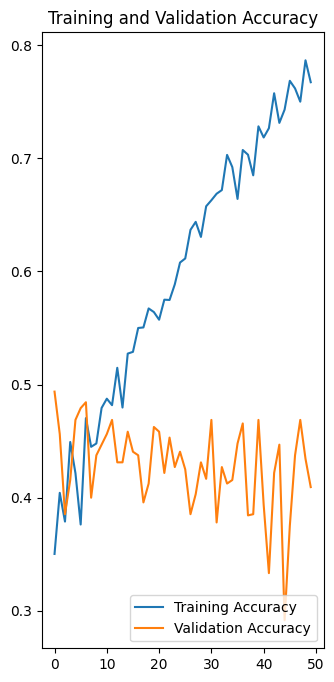

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

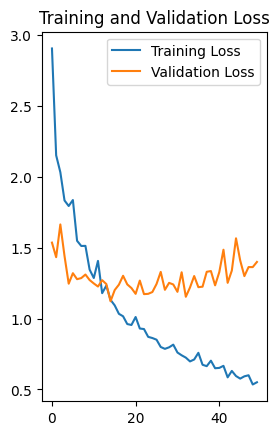

In [47]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [48]:
for image_batch,labels_batch in test_ds.take(1):
    
    print(image_batch[0].numpy())

[[[ 85.546326   85.546326   85.546326 ]
  [  2.0877762   2.0877762   2.0877762]
  [ 23.01119    23.01119    23.01119  ]
  ...
  [ 12.262487   12.262487   12.262487 ]
  [ 16.665182   16.665182   16.665182 ]
  [ 14.948354   14.948354   14.948354 ]]

 [[123.23598   123.23598   123.23598  ]
  [  3.7344296   3.7344296   3.7344296]
  [ 31.235184   31.235184   31.235184 ]
  ...
  [ 17.000053   17.000053   17.000053 ]
  [ 20.508928   20.508928   20.508928 ]
  [ 20.683014   20.683014   20.683014 ]]

 [[100.766525  100.766525  100.766525 ]
  [ 54.816227   54.816227   54.816227 ]
  [ 47.604866   47.604866   47.604866 ]
  ...
  [ 23.81057    23.81057    23.81057  ]
  [ 28.9323     28.9323     28.9323   ]
  [ 29.329824   29.329824   29.329824 ]]

 ...

 [[  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  ...
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]
  [  0.          0.          0.       ]]

 [

2024-04-27 13:09:30.035128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-04-27 13:09:32.827728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


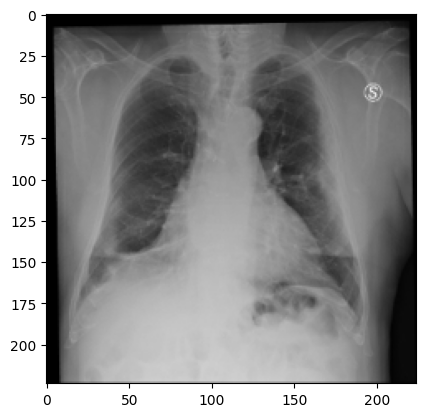

In [49]:
for image_batch,labels_batch in test_ds.take(1):
    
    plt.imshow(image_batch[0].numpy().astype('uint8'))

first image to predict
actual label: 2_Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[3.9330873e-01 1.6736308e-02 5.8342439e-01 4.7210971e-05 6.7750218e-05
 6.5274966e-05 1.4186685e-04 4.4796863e-03 2.2347756e-04 3.5775069e-05
 7.6707671e-05 1.2655114e-04 6.9199756e-05 4.0835759e-05 3.3141252e-05
 7.2426070e-04 2.8798261e-04 3.0900504e-05 6.7604160e-05 1.2234277e-05]
predicted label: 2_Pneumonia


2024-04-27 13:09:40.134552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


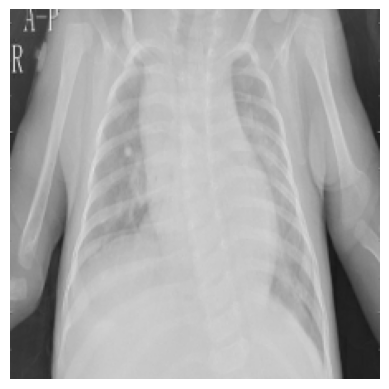

In [50]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


2024-04-27 13:09:51.717095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


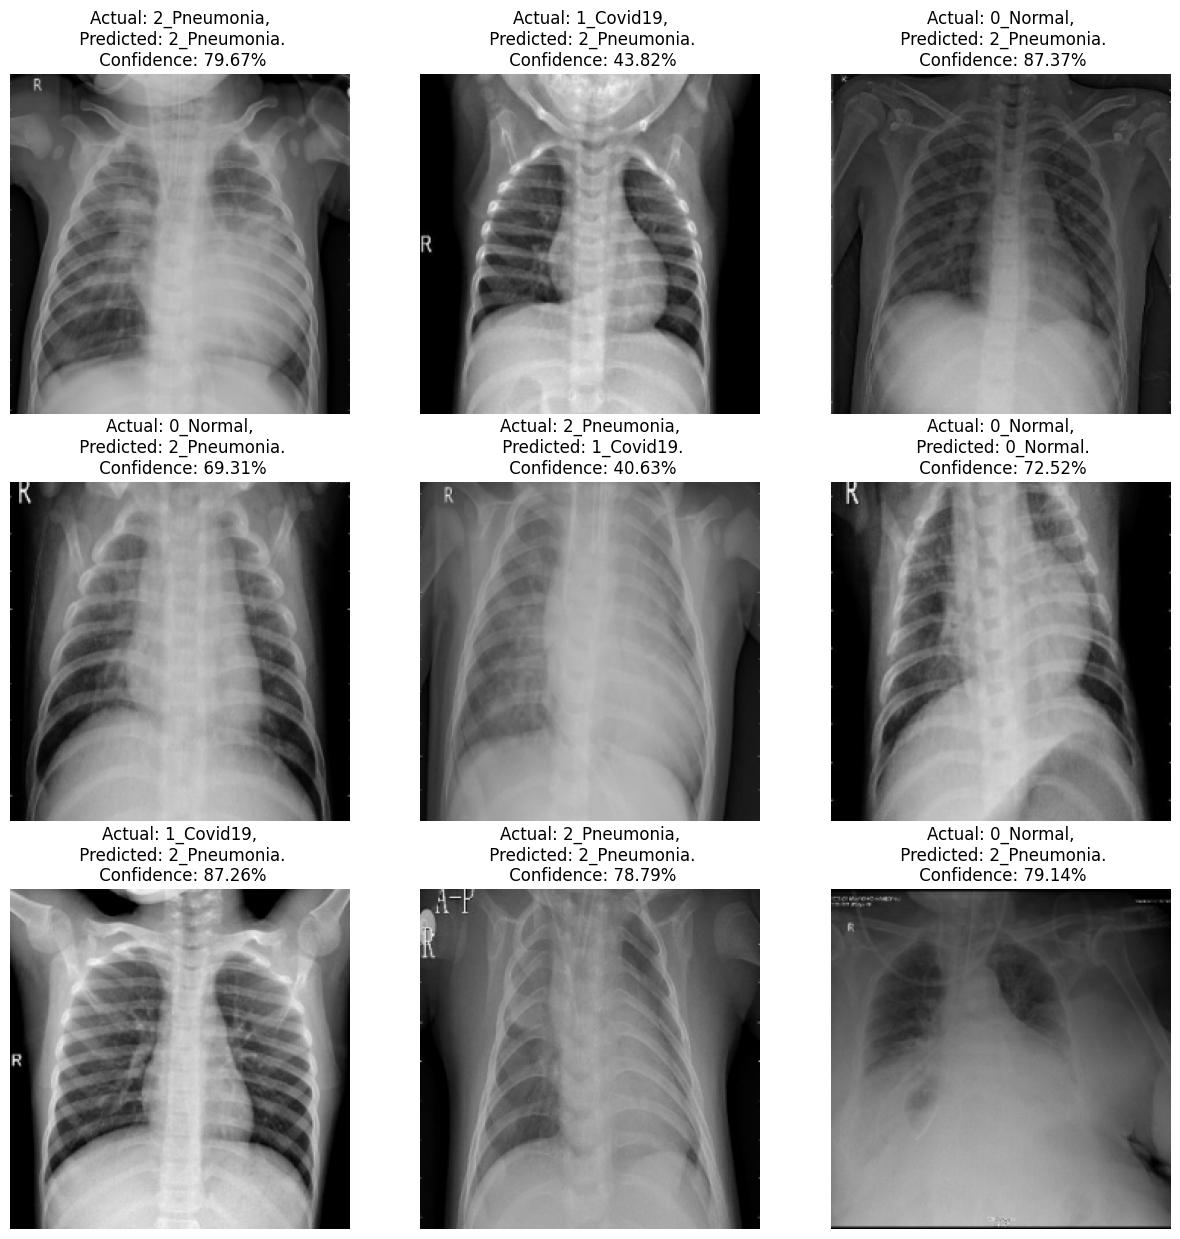

In [52]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [65]:
import os

model_version = 1
model_dir = "./model1"

# Check if the directory exists, create it if not
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Now proceed with finding existing models in the directory
for filename in os.listdir(model_dir):
    try:
        version = int(filename)
        model_version = max(model_version, version)
    except ValueError:
        pass
model_version += 1

# Save the trained model (choose either .h5 or .keras extension)
model.save(f"{model_dir}/{model_version}.h5")  # Use .h5 for HDF5 format
# or
# model.save(f"{model_dir}/{model_version}.keras")  # Use .keras for native Keras format

print(f"Model saved to: {model_dir}/{model_version}.h5")

Model saved to: ./model1/2.h5
